## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/Dataset/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/Dataset/test'


In [16]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [17]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [18]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/Dataset/train/*')

In [19]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [21]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [22]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [23]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [25]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [28]:
import matplotlib.pyplot as plt

In [29]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

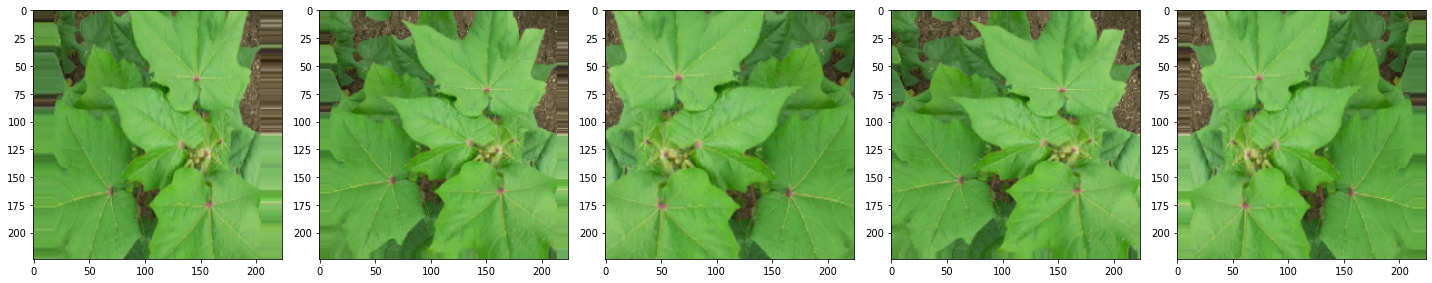

In [30]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [31]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
61/61 [==============================] - 1039s 17s/step - loss: 1.7101 - accuracy: 0.8042 - val_loss: 0.7489 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 51s 829ms/step - loss: 0.6014 - accuracy: 0.9185 - val_loss: 0.6817 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 51s 830ms/step - loss: 0.3119 - accuracy: 0.9503 - val_loss: 0.2724 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 51s 831ms/step - loss: 0.2540 - accuracy: 0.9610 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 51s 830ms/step - loss: 0.2138 - accuracy: 0.9626 - val_loss: 0.1728 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 50s 823ms/step - loss: 0.3161 - accuracy: 0.9569 - val_loss: 0.3316 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 51s 828ms/step - loss: 0.2659 - accuracy: 0.9590 - val_loss: 0.1337 - val_accuracy: 0.9444

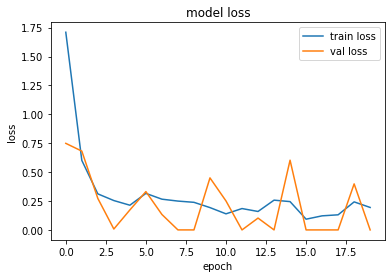

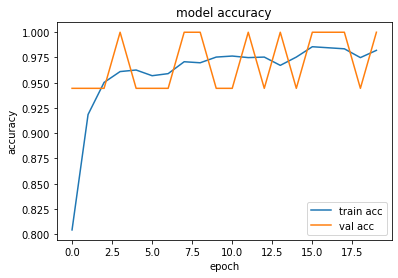

<Figure size 432x288 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/Colab Notebooks/Dataset/model_resnet152V2.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [34]:
accuracy = r.history["accuracy"][-1]
val_accuracy = r.history["val_accuracy"][-1]
loss = r.history["loss"][-1]
val_loss = r.history["val_loss"][-1]

In [36]:
print("Accuracy of resnet152V2 model: {}".format(accuracy) )
print("Loss of resnet152V2 model: {}".format(loss) )

Accuracy of resnet152V2 model: 0.9820604920387268
Loss of resnet152V2 model: 0.19431115686893463
